<a href="https://colab.research.google.com/github/hamednasr/Computer-Vision-with-Python/blob/main/body_move_detection_for_game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import libraries:

In [ ]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt

# load model:

In [ ]:
interpreter = tf.lite.Interpreter(model_path='lite-model_movenet_singlepose_lightning_3.tflite')
interpreter.allocate_tensors()

# make detection:

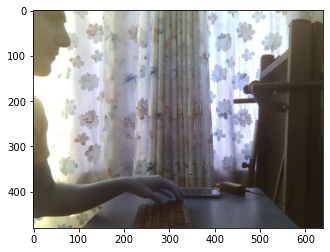

In [ ]:
img = frame.copy()
plt.imshow(img)

In [ ]:
interpreter.get_output_details()

[{'name': 'StatefulPartitionedCall:0',
  'index': 312,
  'shape': array([ 1,  1, 17,  3]),
  'shape_signature': array([ 1,  1, 17,  3]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [ ]:
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    
    img = frame.copy()
    img = tf.image.resize_with_pad(np.expand_dims(img, axis=0), 192, 192)
    input_image = tf.cast(img, dtype = tf.float32)
    
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    
    interpreter.set_tensor(input_details[0]['index'], np.array(input_image))
    interpreter.invoke()
    keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])
    print(keypoints_with_scores)
    
    
    cv2.imshow('Webcam Feed', frame)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

[[[[0.23492347 0.17299917 0.24982634]
   [0.20707196 0.18347347 0.2909708 ]
   [0.2063455  0.1653645  0.2519891 ]
   [0.2149938  0.18392667 0.22510344]
   [0.22189705 0.1497994  0.27838814]
   [0.37544698 0.25422066 0.34912837]
   [0.38487476 0.17279208 0.20345506]
   [0.5070939  0.23876475 0.04660073]
   [0.5127642  0.19079903 0.04391807]
   [0.48700005 0.21763644 0.13317522]
   [0.4855573  0.22421604 0.12264508]
   [0.80492866 0.26306856 0.21847588]
   [0.8030138  0.22242562 0.30302513]
   [0.46584433 0.07434001 0.3166823 ]
   [0.47248256 0.09531601 0.21384016]
   [0.83992493 0.17675635 0.09607676]
   [0.67170894 0.23572233 0.0275234 ]]]]
[[[[0.22363435 0.17144743 0.26776323]
   [0.19422625 0.1858702  0.28554064]
   [0.199989   0.16443247 0.2537282 ]
   [0.20353477 0.20304903 0.23373654]
   [0.2194108  0.13503522 0.29272103]
   [0.3658242  0.27552217 0.398077  ]
   [0.38000077 0.16510752 0.16698334]
   [0.49378753 0.2440139  0.06607875]
   [0.53060204 0.12582211 0.08953759]
   [0.458

[[[[ 2.4185872e-01  2.1575318e-01  1.0830775e-01]
   [ 1.8679687e-01  2.1261999e-01  1.6934106e-01]
   [ 1.8281531e-01  2.1361397e-01  2.4378330e-01]
   [ 2.1965300e-01  1.3559324e-01  5.0684124e-02]
   [ 2.1689390e-01  1.1434289e-01  1.8152854e-01]
   [ 4.1185153e-01  7.0320643e-02  1.1459428e-01]
   [ 4.1906762e-01  8.3251819e-02  1.6506472e-01]
   [ 8.2019699e-01  2.1318689e-01  3.1060255e-01]
   [ 8.2182372e-01  2.2523493e-01  4.9197131e-01]
   [ 5.9405851e-01  4.2199916e-01  3.8331449e-01]
   [ 5.9135455e-01  4.2707384e-01  5.4222012e-01]
   [ 8.6471522e-01 -2.5801238e-04  3.8594633e-02]
   [ 8.5284561e-01  9.0392279e-03  4.3126404e-02]
   [ 4.6154082e-01  8.5429691e-02  1.3538304e-01]
   [ 8.3444047e-01  2.2035734e-01  1.6822186e-01]
   [ 5.8519256e-01  4.3064874e-01  1.3502848e-01]
   [ 5.9011370e-01  4.2688173e-01  1.5662330e-01]]]]
[[[[ 2.36296162e-01  2.31856450e-01  1.88297421e-01]
   [ 1.82789654e-01  2.11833060e-01  2.29967296e-01]
   [ 1.83839887e-01  2.13631064e-01  2.89

[[[[0.24611276 0.20942782 0.35450792]
   [0.19570325 0.19393061 0.3240078 ]
   [0.19801384 0.19274747 0.3858047 ]
   [0.21164796 0.06160365 0.2154592 ]
   [0.21413861 0.07276836 0.372693  ]
   [0.43897712 0.05137636 0.21008986]
   [0.45208997 0.07589819 0.5215968 ]
   [0.81848085 0.20939302 0.3410123 ]
   [0.8269271  0.21594243 0.47138792]
   [0.5848587  0.39680243 0.47641265]
   [0.5821661  0.40729532 0.49955565]
   [0.86633915 0.00168265 0.04997006]
   [0.85812604 0.07054074 0.05556247]
   [0.46558964 0.08268027 0.08501247]
   [0.8366302  0.21347076 0.09368622]
   [0.5780158  0.41502583 0.0805026 ]
   [0.57508683 0.40383267 0.09009731]]]]
[[[[ 0.2748587   0.19537681  0.14610565]
   [ 0.19362335  0.19344875  0.23269543]
   [ 0.19632326  0.18809478  0.26066208]
   [ 0.21250777  0.06215996  0.14588925]
   [ 0.21657822  0.07926925  0.34776586]
   [ 0.43349907  0.05414544  0.17641816]
   [ 0.44727775  0.0789656   0.40959454]
   [ 0.8191466   0.20734373  0.2783519 ]
   [ 0.82324827  0.2144

In [ ]:
keypoints_with_scores[0][0][0][:2]

array([0.33447725, 0.38063785], dtype=float32)